# Part 1 - Dataset

Getting Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/data_endek/

/content/drive/MyDrive/data_endek


#Importing Library

In [3]:
import os
import pandas as pd
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, ZeroPadding2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
tf.__version__

'2.12.0'

In [5]:
%cd train/

/content/drive/MyDrive/data_endek/train


In [6]:

directories = os.listdir()

filename=[]
label=[]

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files=os.listdir()
  for j in range(0, len(files)):
    files[j]=directories[i]+'/'+files[j]
    label.append(directories[i])
    print(files[j])
  filename=filename + files
  os.chdir("..")
  print(filename)
  print(label)

/content/drive/MyDrive/data_endek/train/flora
flora/flora (150).jpg
flora/flora (149).jpg
flora/flora (148).jpg
flora/flora (147).jpg
flora/flora (146).jpg
flora/flora (145).jpg
flora/flora (144).jpg
flora/flora (143).jpg
flora/flora (142).jpg
flora/flora (141).jpg
flora/flora (140).jpg
flora/flora (139).jpg
flora/flora (138).jpg
flora/flora (137).jpg
flora/flora (136).jpg
flora/flora (135).jpg
flora/flora (134).jpg
flora/flora (133).jpg
flora/flora (132).jpg
flora/flora (131).jpg
flora/flora (130).jpg
flora/flora (129).jpg
flora/flora (128).jpg
flora/flora (127).jpg
flora/flora (126).jpg
flora/flora (125).jpg
flora/flora (124).jpg
flora/flora (123).jpg
flora/flora (122).jpg
flora/flora (121).jpg
flora/flora (120).jpg
flora/flora (119).jpg
flora/flora (118).jpg
flora/flora (117).jpg
flora/flora (116).jpg
flora/flora (115).jpg
flora/flora (114).jpg
flora/flora (113).jpg
flora/flora (112).jpg
flora/flora (111).jpg
flora/flora (110).jpg
flora/flora (109).jpg
flora/flora (108).jpg
flora/fl

Count image files

In [7]:
print(len(filename))

2311


Save list of images

In [8]:

data = {"filename": filename,
        "label": label
        }

df = pd.DataFrame(data=data)

Print the list of images file

In [9]:
print(df)

                   filename  label
0     flora/flora (150).jpg  flora
1     flora/flora (149).jpg  flora
2     flora/flora (148).jpg  flora
3     flora/flora (147).jpg  flora
4     flora/flora (146).jpg  flora
...                     ...    ...
2306    fauna/fauna (6).jpg  fauna
2307  fauna/fauna (761).jpg  fauna
2308  fauna/fauna (760).jpg  fauna
2309  fauna/fauna (762).jpg  fauna
2310  fauna/fauna (759).jpg  fauna

[2311 rows x 2 columns]


Randomize the list of images

In [10]:
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

                           filename      label
574           flora/flora (430).jpg      flora
1847          fauna/fauna (467).jpg      fauna
19            flora/flora (131).jpg      flora
369           flora/flora (634).jpg      flora
1557          fauna/fauna (753).jpg      fauna
...                             ...        ...
1393  gringsing/gringsing (130).jpg  gringsing
221           flora/flora (772).jpg      flora
1397  gringsing/gringsing (132).jpg  gringsing
411           flora/flora (597).jpg      flora
51             flora/flora (99).jpg      flora

[2311 rows x 2 columns]


Cross Validation

In [11]:

train_data = df_shuffled

Y = train_data[['label']]

#the number of split
kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

Preprocessing the training set

In [12]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

Preprocessing the Test set

In [13]:
test_datagen = ImageDataGenerator(rescale = 1/.255)

# Part 2 - Building CNN

Define the directories of dataset

In [15]:
image_dir = '/content/drive/My Drive/data_endek/train'

Method for save the best CNN Model

In [16]:
def get_model_name(k):
  return 'model_'+str(k)+'.h5'

Import and define the performance metric

In [17]:

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

Build and Train the CNN Model

In [ ]:
# Define input shape
input_shape = (128, 128, 3)

# Define input tensor
input_tensor = Input(shape=input_shape)

# Load ResNet-50 pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
base_model.trainable = False

# Add additional layers on top of the base model
x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(base_model.output)
x = Conv2D(64, (7, 7))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=2)(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Print the model summary
model.summary()

# Define input shape
input_shape = (128, 128, 3)

# Define input tensor
input_tensor = Input(shape=input_shape)

# Add additional layers on top of the input tensor
x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(input_tensor)
x = Conv2D(64, (7, 7))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=2)(x)

# Load ResNet-50 pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
base_model.trainable = False

# Add additional layers on top of the base model
x = base_model(x, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(3, activation='softmax')(x)  # Assuming 3 classes: gringsing, flora, fauna

# Create the final model
model = Model(inputs=input_tensor, outputs=x)

# Print the model summary
model.summary()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=10,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
116/116 [==============================] - ETA: 0s - loss: 1.0763 - accuracy: 0.6239
Epoch 1: val_accuracy improved from -inf to 0.72354, saving model to /saved_models/model_1.h5
116/116 [==============================] - 373s 3s/step - loss: 1.0763 - accuracy: 0.6239 - val_loss: 0.5791 - val_accuracy: 0.7235
Epoch 2/10
116/116 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.6775
Epoch 2: val_accuracy did not improve from 0.72354
116/116 [==============================] - 17s 151ms/step - loss: 0.6660 - accuracy: 0.6775 - val_loss: 0.5851 - val_accuracy: 0.6782
Epoch 3/10
116/116 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7332
Epoch 3: val_accuracy improved from 0.72354 to 0.79914, saving model to /saved_models/model_1.h5
116/116 [=========

VIEW THE PREFORMANCE


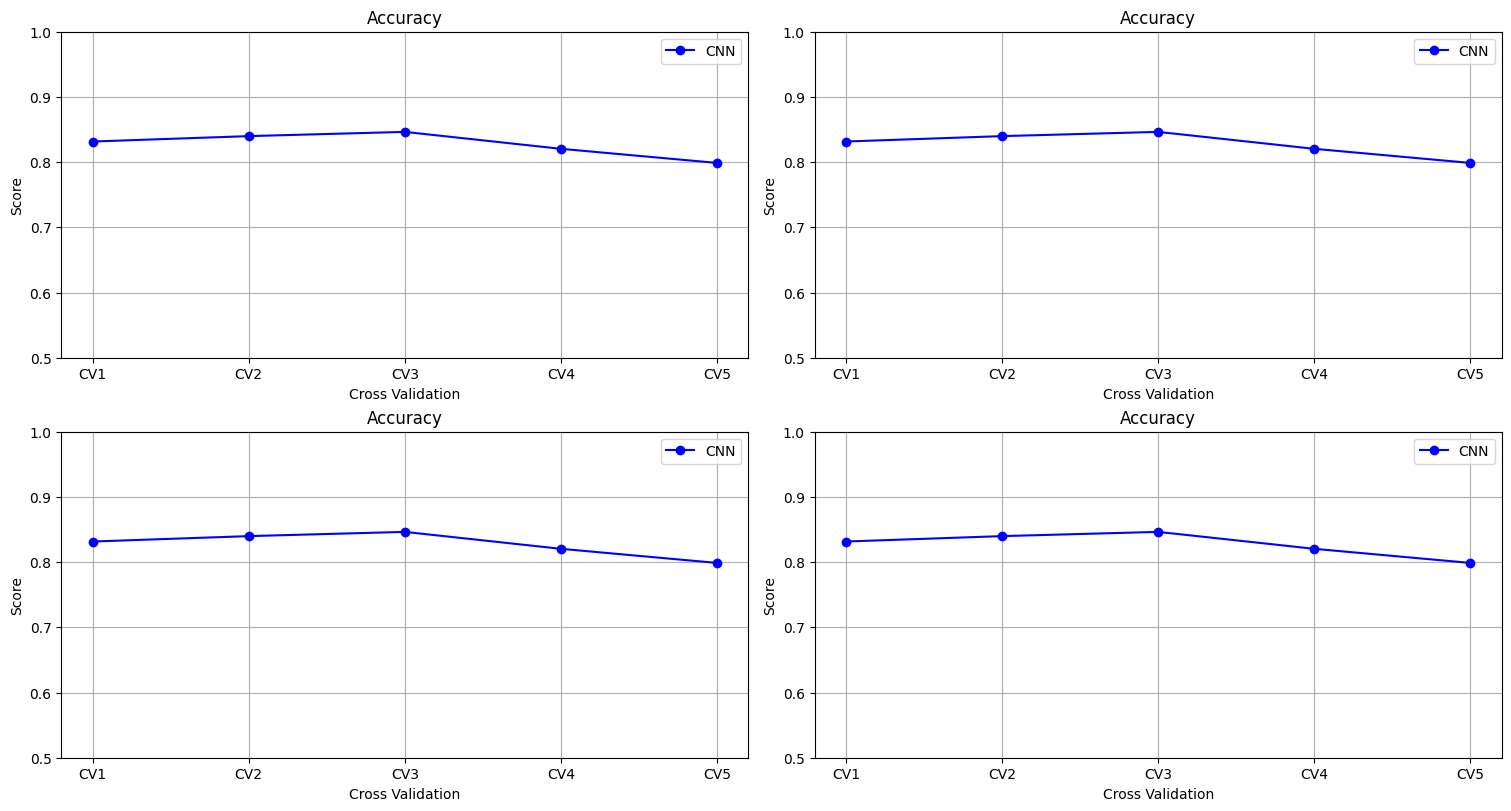

In [ ]:

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:
cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[103  35   4]
 [ 50 118   2]
 [  1   1 148]]


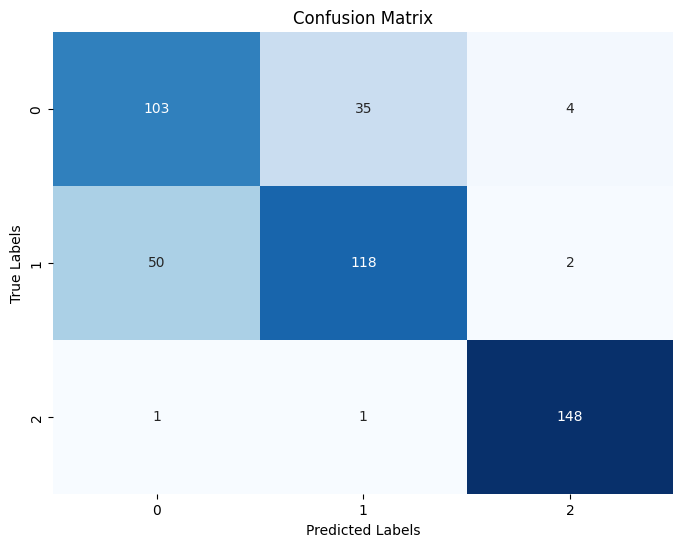

In [ ]:

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

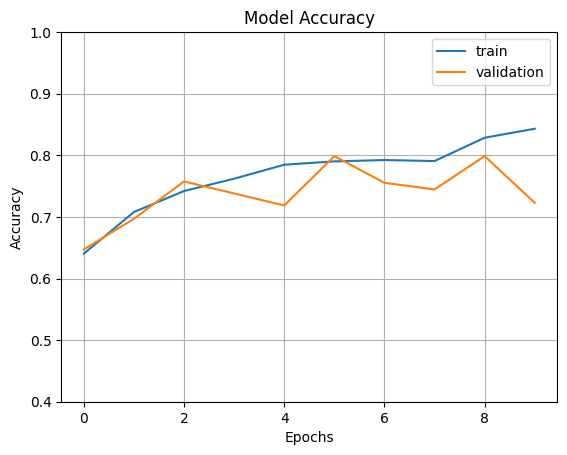

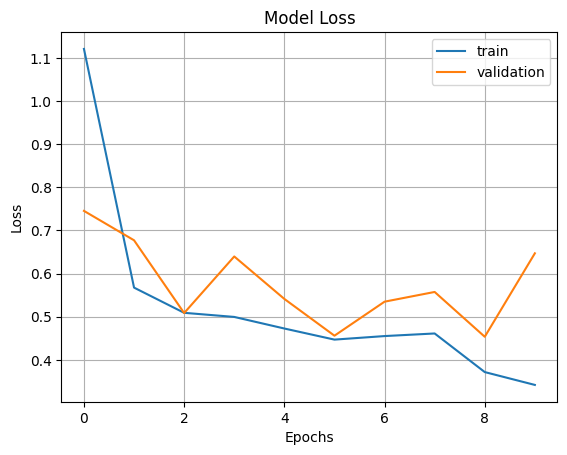

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=20,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/20
116/116 [==============================] - ETA: 0s - loss: 1.3976 - accuracy: 0.5676
Epoch 1: val_accuracy improved from -inf to 0.68467, saving model to /saved_models/model_1.h5
116/116 [==============================] - 21s 160ms/step - loss: 1.3976 - accuracy: 0.5676 - val_loss: 0.6046 - val_accuracy: 0.6847
Epoch 2/20
116/116 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.6613
Epoch 2: val_accuracy did not improve from 0.68467
116/116 [==============================] - 26s 224ms/step - loss: 0.6924 - accuracy: 0.6613 - val_loss: 0.5814 - val_accuracy: 0.6847
Epoch 3/20
116/116 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.7029
Epoch 3: val_accuracy improved from 0.68467 to 0.70194, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 188ms/step - loss: 0.5866 - accura

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 88  53   1]
 [ 13 155   2]
 [  0   1 149]]


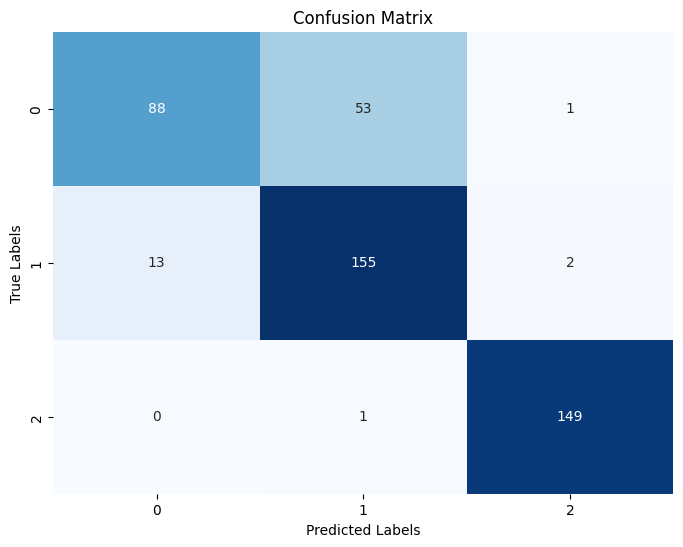

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

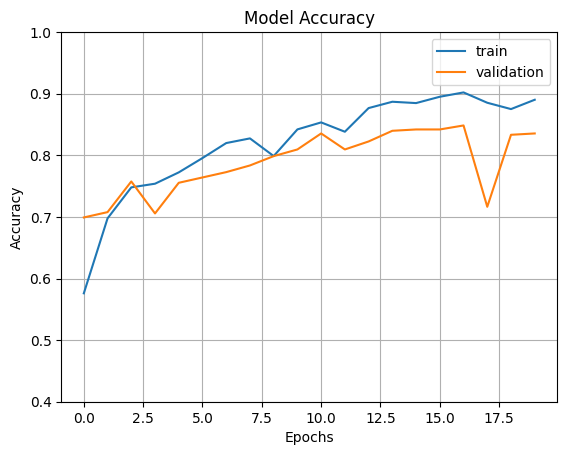

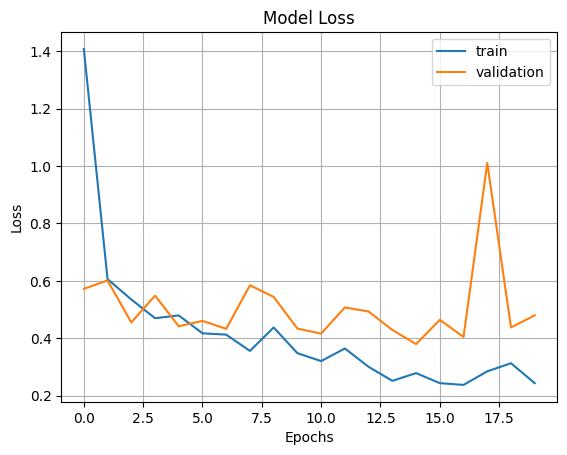

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=30,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/30
116/116 [==============================] - ETA: 0s - loss: 0.9704 - accuracy: 0.6136
Epoch 1: val_accuracy improved from -inf to 0.67387, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 166ms/step - loss: 0.9704 - accuracy: 0.6136 - val_loss: 0.6553 - val_accuracy: 0.6739
Epoch 2/30
116/116 [==============================] - ETA: 0s - loss: 0.5961 - accuracy: 0.7094
Epoch 2: val_accuracy improved from 0.67387 to 0.69978, saving model to /saved_models/model_1.h5
116/116 [==============================] - 17s 147ms/step - loss: 0.5961 - accuracy: 0.7094 - val_loss: 0.5730 - val_accuracy: 0.6998
Epoch 3/30
116/116 [==============================] - ETA: 0s - loss: 0.5177 - accuracy: 0.7603
Epoch 3: val_accuracy improved from 0.69978 to 0.74514, saving model to /saved_models/model_1.h5
116/116 [==========================

In [ ]:
cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[111  30   1]
 [ 23 145   2]
 [  0   0 150]]


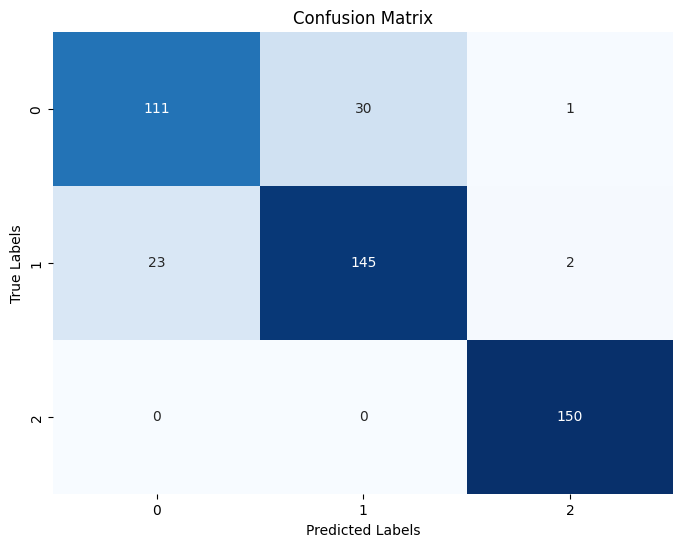

In [ ]:

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

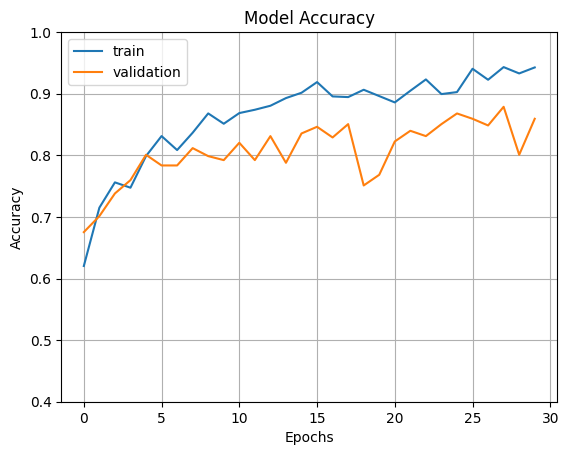

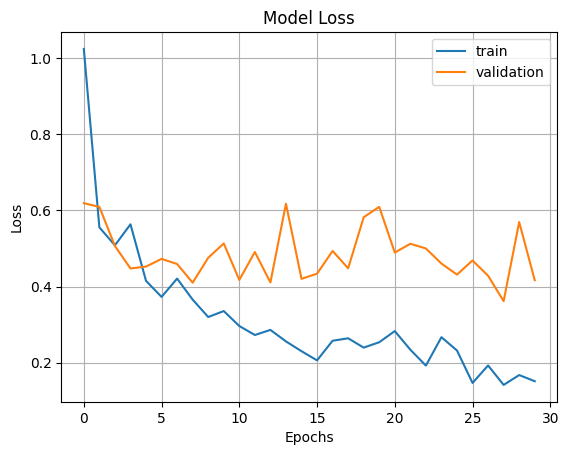

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=40,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/40
116/116 [==============================] - ETA: 0s - loss: 1.1936 - accuracy: 0.6098
Epoch 1: val_accuracy improved from -inf to 0.72570, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 164ms/step - loss: 1.1936 - accuracy: 0.6098 - val_loss: 0.5995 - val_accuracy: 0.7257
Epoch 2/40
116/116 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7435
Epoch 2: val_accuracy improved from 0.72570 to 0.76674, saving model to /saved_models/model_1.h5
116/116 [==============================] - 17s 148ms/step - loss: 0.5315 - accuracy: 0.7435 - val_loss: 0.5164 - val_accuracy: 0.7667
Epoch 3/40
116/116 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.7246
Epoch 3: val_accuracy did not improve from 0.76674
116/116 [==============================] - 17s 143ms/step - loss: 0.5263 - accura

In [ ]:

cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[108  34   0]
 [ 21 147   2]
 [  1   3 146]]


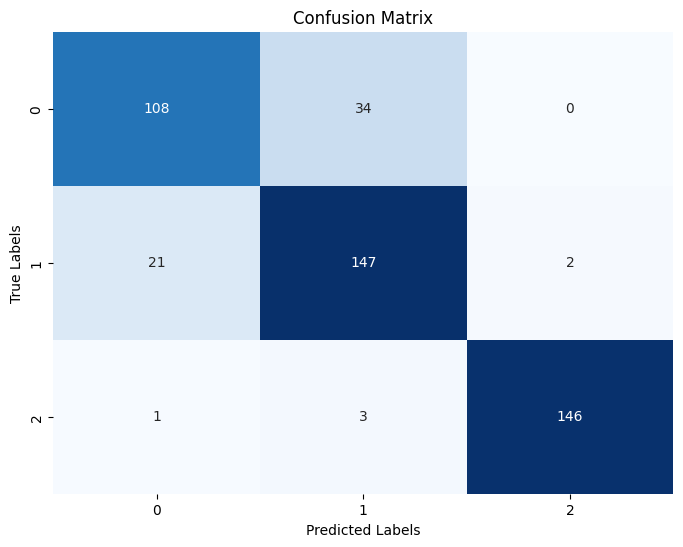

In [ ]:

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

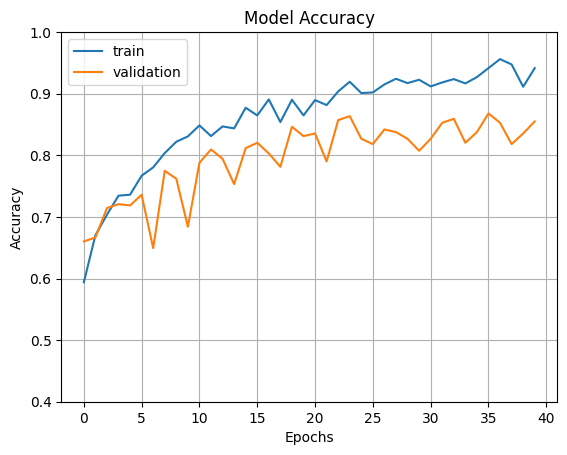

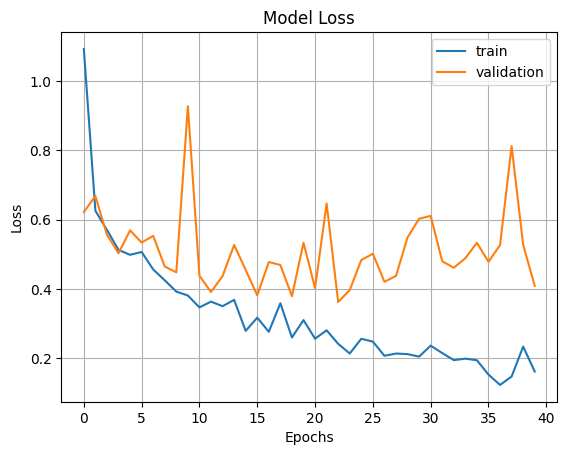

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=50,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 1.1671 - accuracy: 0.6163
Epoch 1: val_accuracy improved from -inf to 0.61339, saving model to /saved_models/model_1.h5
116/116 [==============================] - 299s 2s/step - loss: 1.1671 - accuracy: 0.6163 - val_loss: 0.7568 - val_accuracy: 0.6134
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 0.5873 - accuracy: 0.7002
Epoch 2: val_accuracy improved from 0.61339 to 0.71922, saving model to /saved_models/model_1.h5
116/116 [==============================] - 18s 157ms/step - loss: 0.5873 - accuracy: 0.7002 - val_loss: 0.5405 - val_accuracy: 0.7192
Epoch 3/50
116/116 [==============================] - ETA: 0s - loss: 0.5294 - accuracy: 0.7289
Epoch 3: val_accuracy did not improve from 0.71922
116/116 [=========

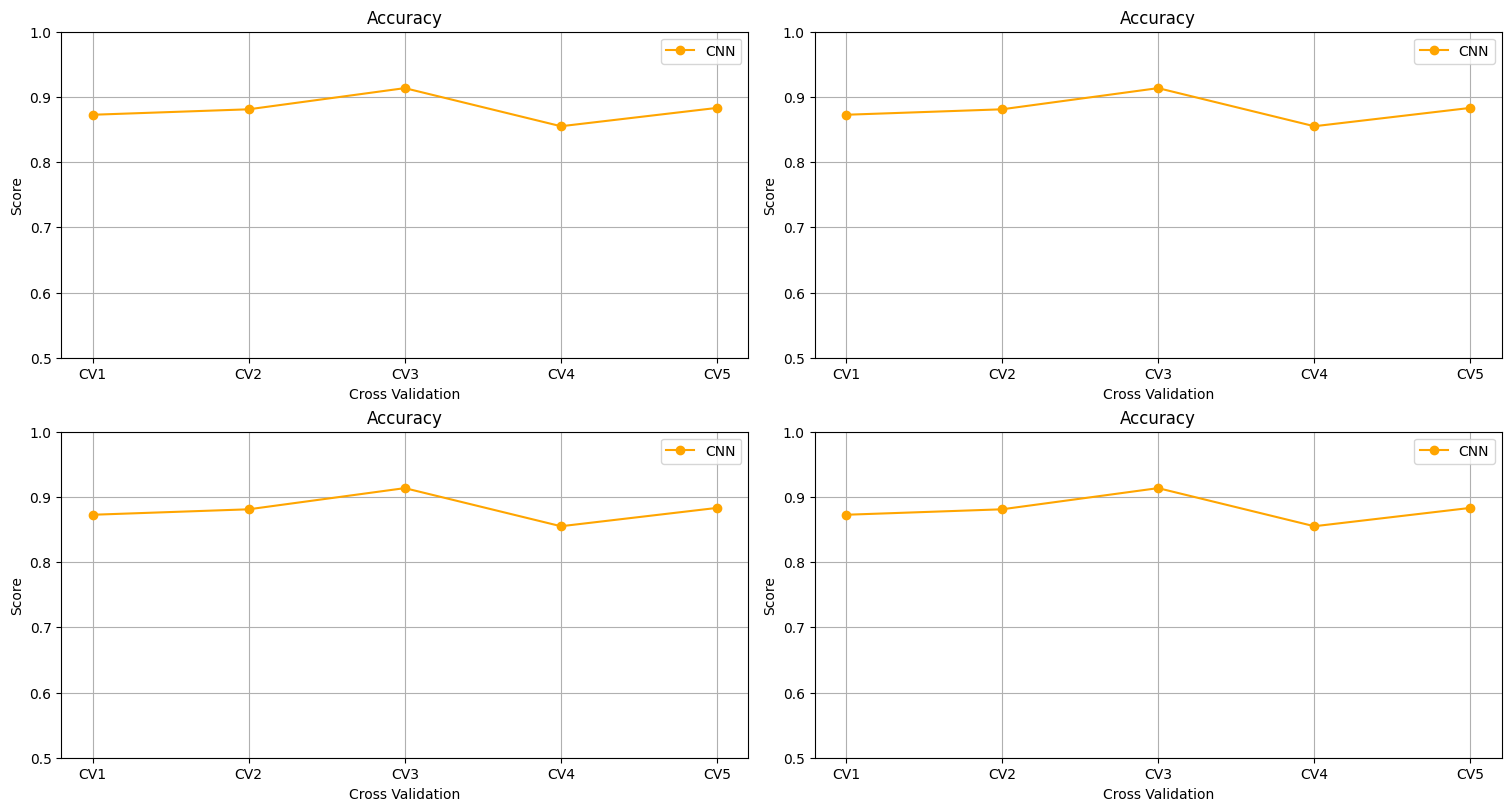

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [20]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[134  18   2]
 [ 33 131   0]
 [  1   0 143]]


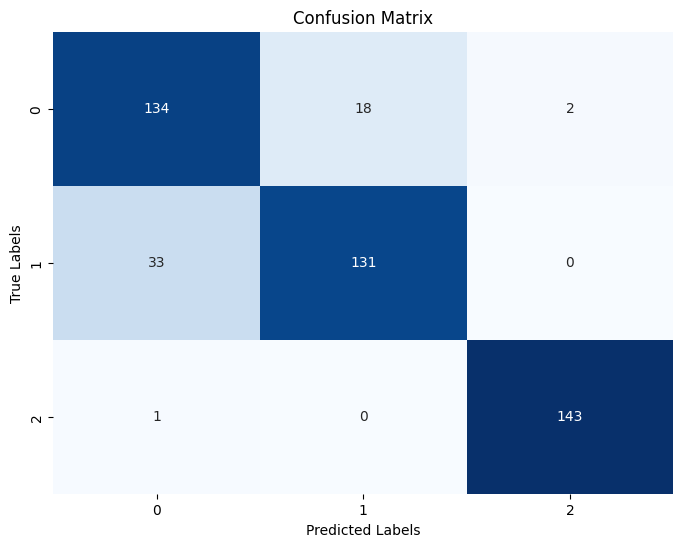

In [21]:

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

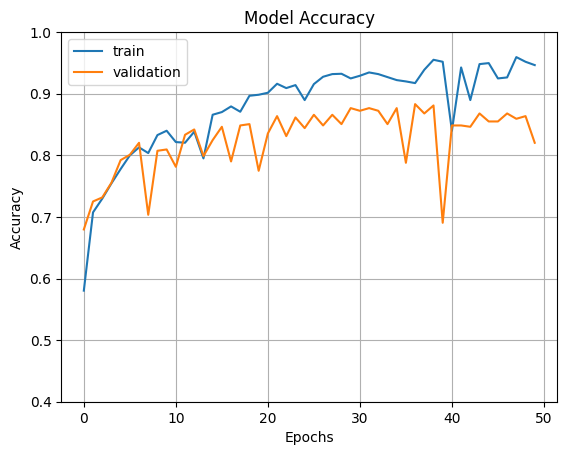

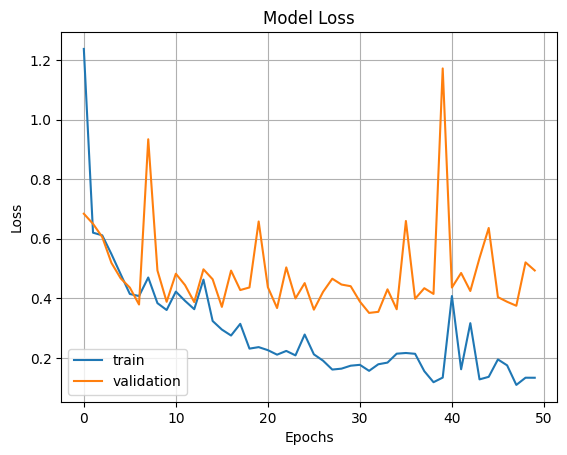

In [22]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()